<a href="https://colab.research.google.com/github/JMCastle98/M4_Analisis_de_Datos_con_Python/blob/main/Postwork04/Postwork04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Postwork 4 - Regresión Lineal 

Hasta ahora hemos analizado cada una de las variables por separado y algunas con cierta relación con otras, pero no se ha profundizado en este hecho, por lo que a partir de aquí nos involucraremos en realizar este análisis, conocer más a detalle la relación entre par de variables. 

Saber como si un pokémon con poca defensa tiene más poder al atacar o esto no pasa, conocer si su peso y su altura influye en su estilo de pelea o en sus puntos totales. Este será el principal interés de esta sección.

Para iniciar trabajaremos con el dataframe que ya se ha limpiado anteriormente y observaremos la correlación entre sus variables. 


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df_clean = pd.read_csv("https://raw.githubusercontent.com/JMCastle98/M4_Analisis_de_Datos_con_Python/main/Dataset/pok%C3%A9dex_clean.csv", index_col=0)

In [ ]:
#Volvemos a selecionar el DataFrame de las columnas ya limpias
df_clean.head()

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,318,45,49,49,65,65,45,45.0,Medium Slow
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,405,60,62,63,80,80,60,45.0,Medium Slow
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,525,80,82,83,100,100,80,45.0,Medium Slow
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,625,80,100,123,122,120,80,45.0,Medium Slow
4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,None,0.6,8.5,309,39,52,43,60,50,65,45.0,Medium Slow


## Identificación de variables númericas

En primera instancia para conocer como es la relación entre las variables, sabemos que con la función .corr() es posible obtener la correlación de dos variables a la vez, por lo que obtenemos las de nuestro dataframe,
obtenemos la matriz de correlación, para conocer la relación entre las variables de los pokémon.

In [ ]:
df_clean.corr()

,pokedex_number,generation,type_number,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate
pokedex_number,1.000000,0.963664,0.042805,0.065656,0.120298,0.136512,0.117898,0.122968,0.099078,0.096609,0.084225,0.029577,-0.101681
generation,0.963664,1.000000,0.037549,0.055697,0.096232,0.091050,0.098174,0.088075,0.063270,0.065377,0.051344,0.002355,-0.065943
type_number,0.042805,0.037549,1.000000,0.083076,0.094676,0.212363,0.091722,0.140603,0.205127,0.164098,0.158768,0.087831,-0.159515
height_m,0.065656,0.055697,0.083076,1.000000,0.853254,0.374311,0.374797,0.205505,0.305927,0.202550,0.308383,0.137067,-0.067585
weight_kg,0.120298,0.096232,0.094676,0.853254,1.000000,0.445399,0.448376,0.312098,0.440274,0.195717,0.344531,0.079505,-0.149104
total_points,0.136512,0.091050,0.212363,0.374311,0.445399,1.000000,0.650568,0.733028,0.629656,0.732795,0.719940,0.561368,-0.704478
hp,0.117898,0.098174,0.091722,0.374797,0.448376,0.650568,1.000000,0.443752,0.299977,0.371185,0.392835,0.189705,-0.447941
attack,0.122968,0.088075,0.140603,0.205505,0.312098,0.733028,0.443752,1.000000,0.456565,0.369529,0.266685,0.373712,-0.525933
defense,0.099078,0.063270,0.205127,0.305927,0.440274,0.629656,0.299977,0.456565,1.000000,0.222737,0.544896,0.004664,-0.424311
sp_attack,0.096609,0.065377,0.164098,0.202550,0.195717,0.732795,0.371185,0.369529,0.222737,1.000000,0.510727,0.445268,-0.527375


De aquí se tienen que retirar ciertas columnas que no tienen que ver con las carácteristicas propiamente de pelea de los pokémon, como son:

    - pokedex_number
    - generation
    - type_number
    - catch_rate

Retiramos estás variables de nuestros datos y obtenemos un dataframe númerico

In [ ]:
df_numerico = df_clean[["height_m","weight_kg","total_points","hp","attack","defense","sp_attack","sp_defense","speed"]]
df_numerico

,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,0.7,6.9,318,45,49,49,65,65,45
1,1.0,13.0,405,60,62,63,80,80,60
2,2.0,100.0,525,80,82,83,100,100,80
3,2.4,155.5,625,80,100,123,122,120,80
4,0.6,8.5,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...
1040,2.2,800.0,580,100,145,130,65,110,30
1041,2.0,44.5,580,100,65,60,145,80,130
1042,1.1,7.7,500,100,80,80,80,80,80
1043,2.4,809.1,680,100,165,150,85,130,50


Realicemos un mapa de calor para identicar mejor las variables, en la parte del código anterior notamos que ninguna tiene correlación negativa, por lo que este mapa de calor lo realizaremos de 0 a 1.

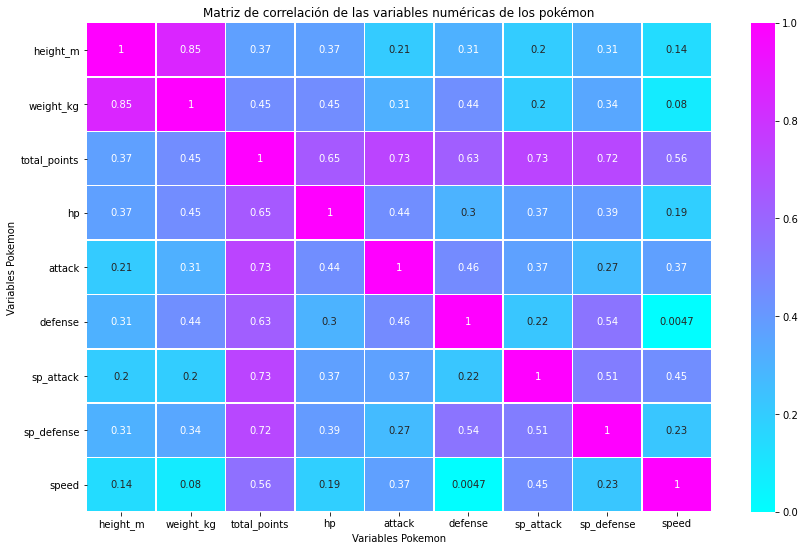

In [ ]:
plt.figure(figsize=(14,9))
ax = sns.heatmap(df_numerico.corr(), vmin=0, vmax=1, annot=True, cmap="cool", linewidths=0.5)

plt.title("Matriz de correlación de las variables numéricas de los pokémon")

plt.xlabel("Variables Pokemon")

plt.ylabel("Variables Pokemon")
plt.show()

Un heatmap muy ilustrativo, pero aún podemos obtener más información, realicemos un pairplot para observar los scatterplot de cada par de variables.

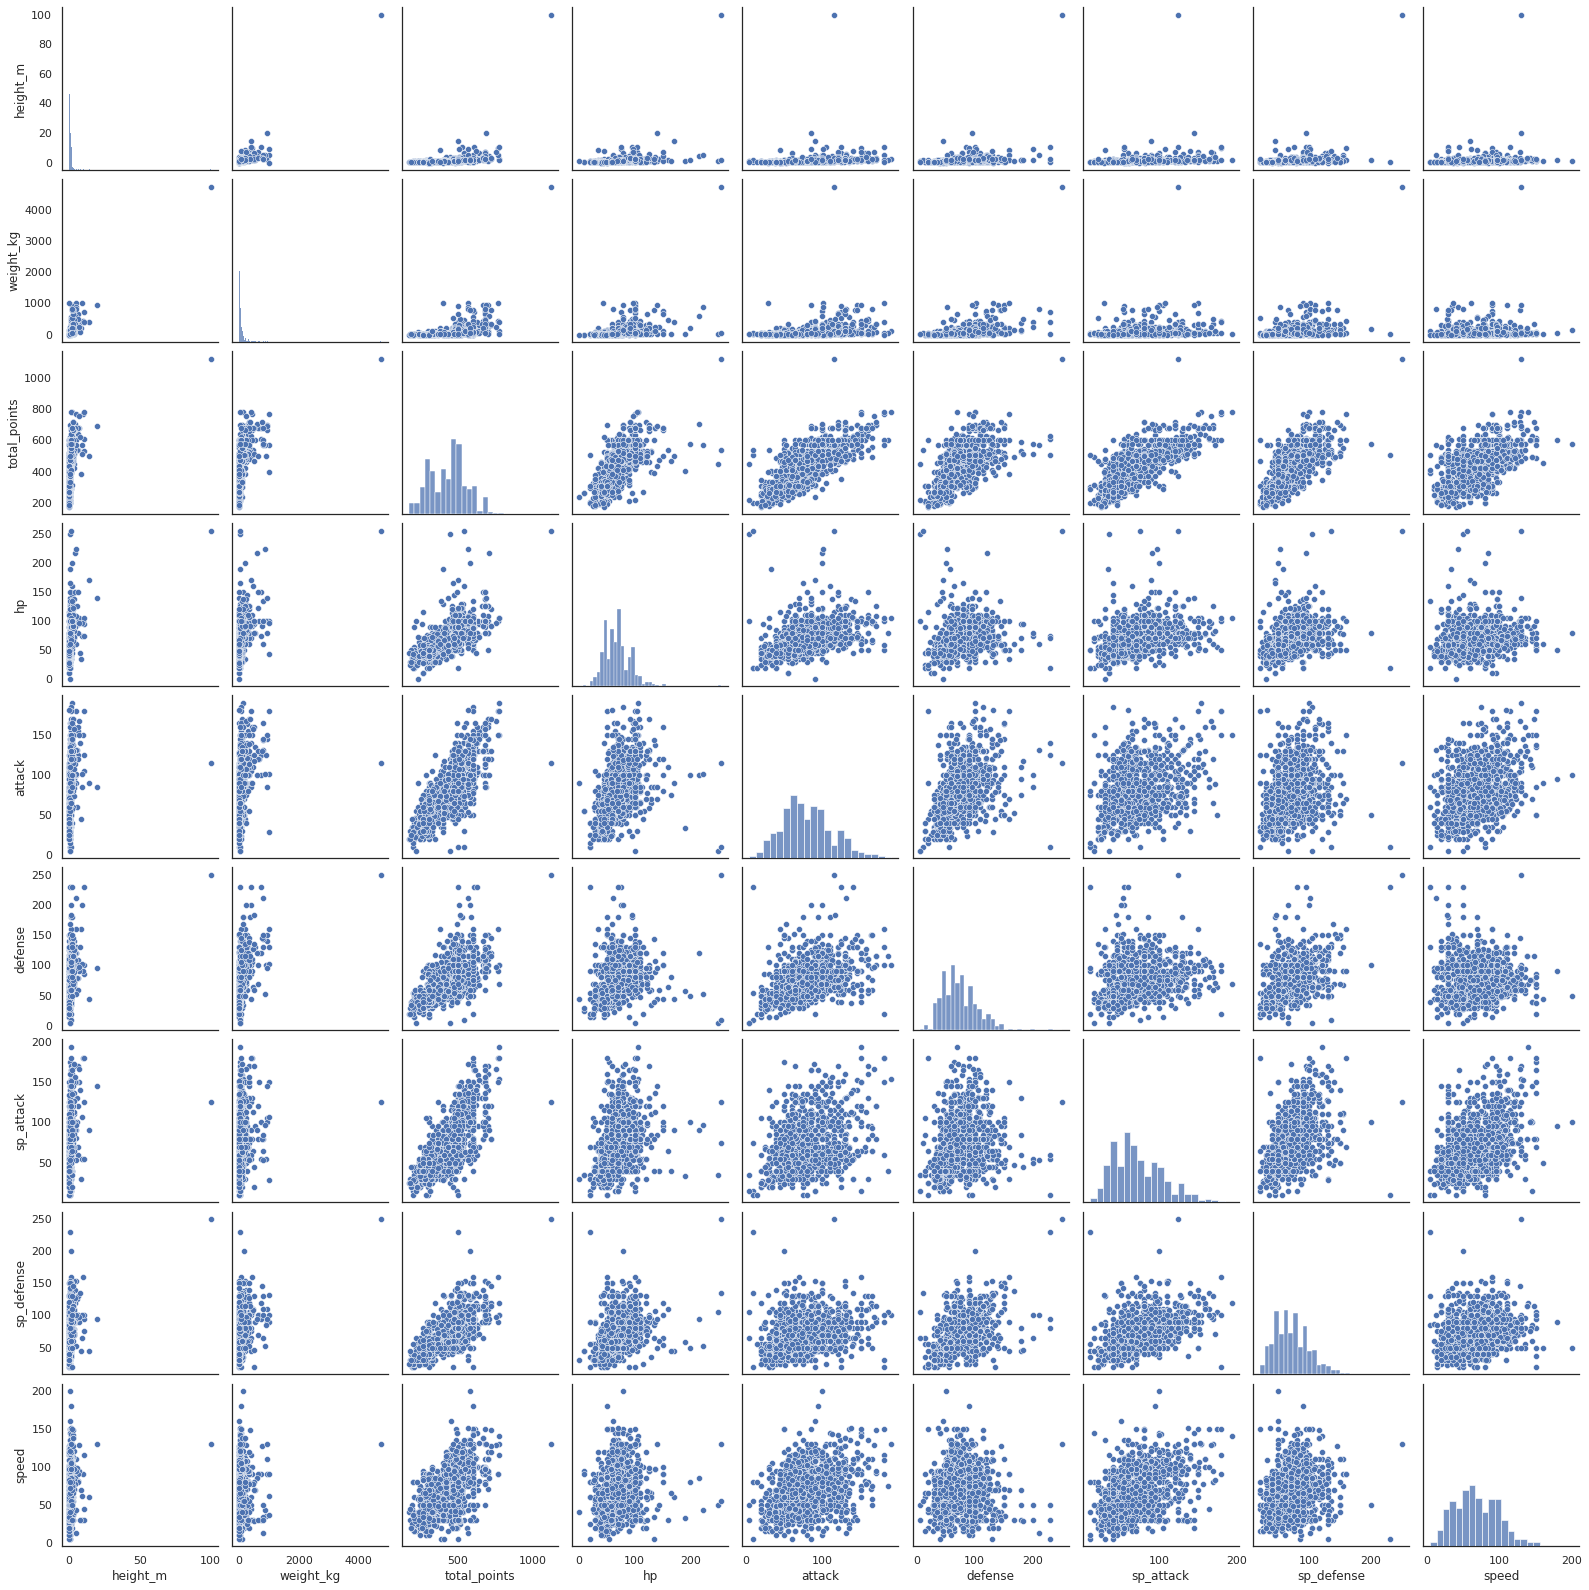

In [ ]:
#realizamos un pairplot para a primera instancia conocer cuales son las variables más "relacionadas"
sns.pairplot(df_numerico);

Notamos un valor atípico muy significativo (Eternatus...) en el peso, por lo que ese lo retiraremos de nuestros datos, ya que puede hacer una diferencia significativa en nuestros ajustes de regresión y en nuestra matriz de correlación, sobre todo en nuestros datos asociados al peso de los pokémon.

In [ ]:
df_numerico = df_numerico[df_numerico['weight_kg']!=df_numerico['weight_kg'].max()]
df_numerico

,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,0.7,6.9,318,45,49,49,65,65,45
1,1.0,13.0,405,60,62,63,80,80,60
2,2.0,100.0,525,80,82,83,100,100,80
3,2.4,155.5,625,80,100,123,122,120,80
4,0.6,8.5,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...
1040,2.2,800.0,580,100,145,130,65,110,30
1041,2.0,44.5,580,100,65,60,145,80,130
1042,1.1,7.7,500,100,80,80,80,80,80
1043,2.4,809.1,680,100,165,150,85,130,50


Nuevamente volvemos a realizar un pairplot para observar la dispersión de estos sin ese valor atípico.

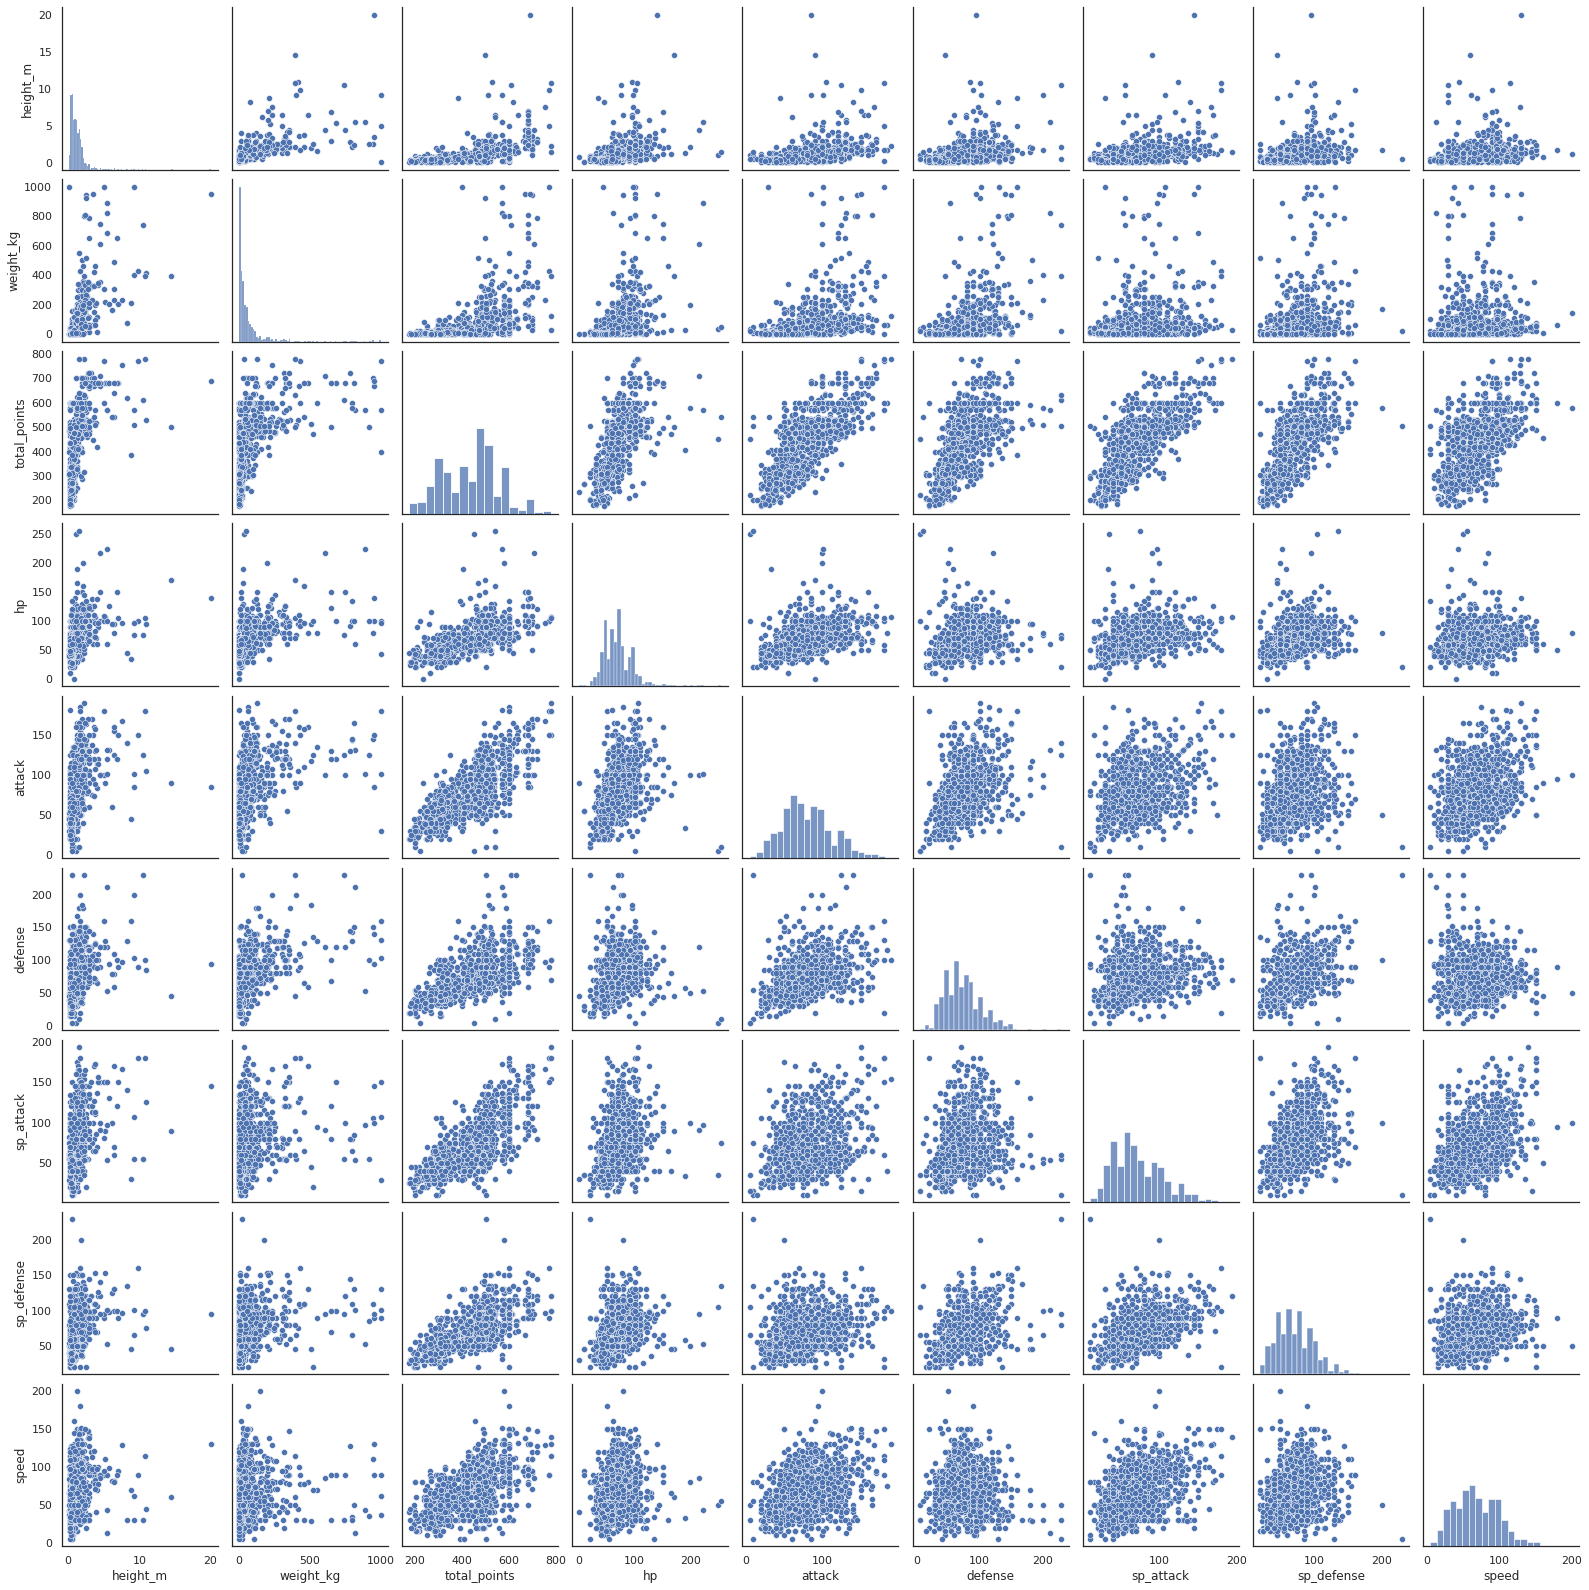

In [ ]:
sns.pairplot(df_numerico);

Tenemos bastantes variables con alta correlación entre ellas.

Como ya se mencionó al inicio de este proyecto, la variable *total_points* depende de las demás variables, por lo que su correlación es alta al ser comparada con cualquier otra variable, debido a esto no la tomaremos en cuenta para realizar la regresión lineal para hacer un análisis más certero.


Nuevamente volvamos a realizar un heatmap() para observar como cambio nuestra matriz de correlación. 


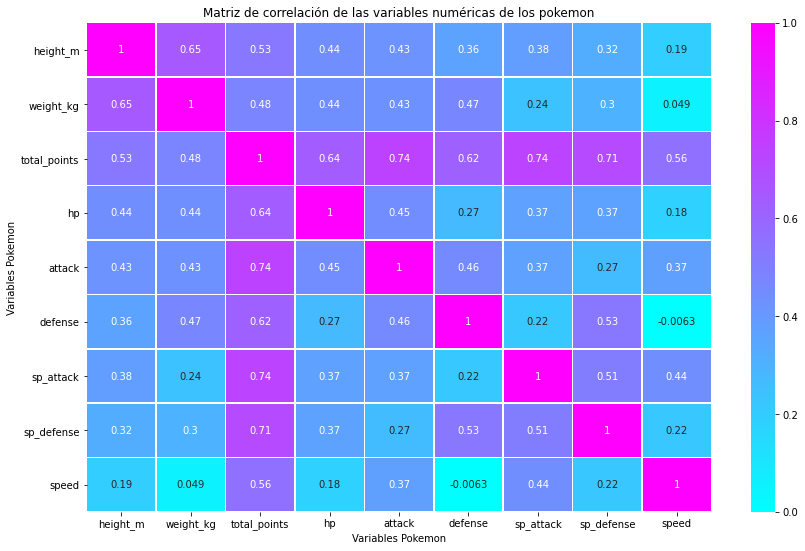

In [ ]:

plt.figure(figsize=(14,9))
ax = sns.heatmap(df_numerico.corr(), vmin=0, vmax=1, annot=True, cmap="cool", linewidths=0.5)

plt.title("Matriz de correlación de las variables numéricas de los pokemon")

plt.xlabel("Variables Pokemon")

plt.ylabel("Variables Pokemon")
plt.show()

A partir de la matriz de correlación anterior, nos centraremos en los 5 pares de variables con mayor correlación, las cuales son:

        1.- height_m  -- weight_kg    coef_corr = 0.65
        2.- defense   -- sp_defense   coef_corr = 0.53
        3.- sp_attack -- sp_defense   coef_corr = 0.51
        4.- attack    -- defense      coef_corr = 0.46
        5.- weight_kg -- hp           coef_corr = 0.45


        


Con estos 5 pares de variables realizaremos regresiones lineales que nos den un panórama más amplio de su comportamiento.

## Regresión Lineal Simple y Multiple

Analizaremos las 5 variables mencionadas en la parte superior para una regresión lineal simple y así determinar la calidad del ajuste obteniendo su parámetro de $R^2$.

Por otro lado al depender la variable *total_points* de la mayoria de las variables, esta será utilizada en la regresión lineal multiple para realizar un entrenamiento de nuestro modelo y una validación cruzada del mismo.

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import numpy as np


In [ ]:
def regresion_lineal(campo1, campo2):
  sns.set_style(style="darkgrid")
  lr = LinearRegression()
  lr.fit(df_numerico[campo1].to_frame(), df_numerico[campo2])
  y_predict = lr.predict(df_numerico[campo1].to_frame())

  plt.scatter(x = df_numerico[campo1], y= df_numerico[campo2], s=20, 
                   c = df_numerico["total_points"], label = "Datos", cmap = "winter" )
  plt.colorbar(label= 'Total points')
  sns.lineplot(x = df_numerico[campo1],y = y_predict, color = "r",
               label= f"Ajuste lineal   \n  $R^2$ = {np.round( lr.score(df_numerico[campo1].to_frame(), df_numerico[campo2]), 2) }")

  plt.title(f"Relación lineal la variable '{campo1}' y la variable '{campo2}' " )
  plt.xlabel(campo1)
  plt.ylabel(campo2)
  
  plt.show()


In [ ]:

def regresion_lineal_multiple(campo1, campo2, campo_dep):
  X = df_numerico[[campo1,campo2]]
  y = df_numerico[campo_dep]
  sns.set_style(style="darkgrid")


  X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


  lr = LinearRegression()
  lr.fit(X_training, y_training)
  print("El ajuste de la regresión lineal múltiple es",lr.score(X_test, y_test))

  scores = cross_validate(lr, X, y, scoring='r2')
  
  print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')




#X = df_numerico[["weight_kg","height_m"]]
#y = df_numerico.total_points


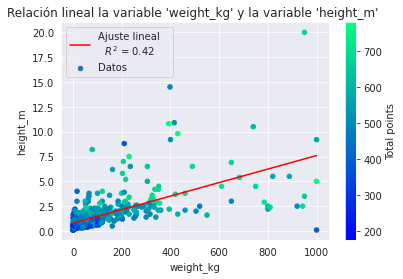

In [ ]:
regresion_lineal("weight_kg", "height_m")

In [ ]:
regresion_lineal_multiple("weight_kg", "height_m","total_points")

El ajuste de la regresión lineal múltiple es 0.3417221829694812
Score del modelo: 0.252 +/- 0.089


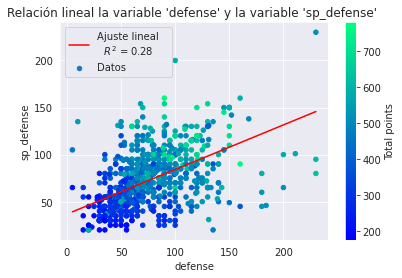

In [ ]:
regresion_lineal("defense","sp_defense")

In [ ]:
regresion_lineal_multiple("defense","sp_defense","total_points")

El ajuste de la regresión lineal múltiple es 0.5211109655443337
Score del modelo: 0.566 +/- 0.075


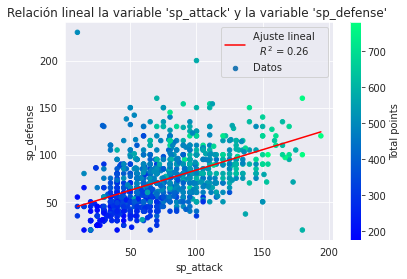

In [ ]:
regresion_lineal("sp_attack","sp_defense")

In [ ]:
regresion_lineal_multiple("sp_attack","sp_defense","total_points")

El ajuste de la regresión lineal múltiple es 0.684356162802059
Score del modelo: 0.674 +/- 0.054


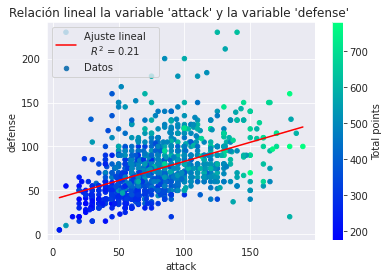

In [ ]:
regresion_lineal("attack","defense")

In [ ]:
regresion_lineal_multiple("attack","defense","total_points")

El ajuste de la regresión lineal múltiple es 0.6041306766398592
Score del modelo: 0.621 +/- 0.067


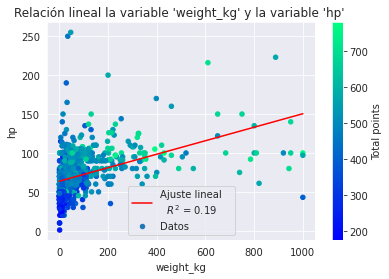

In [ ]:
regresion_lineal("weight_kg","hp")

In [ ]:
regresion_lineal_multiple("weight_kg","hp","total_points")

El ajuste de la regresión lineal múltiple es 0.3527676312469349
Score del modelo: 0.408 +/- 0.083


El mejor ajuste por si mismo se logró entre el peso y altura de los pokémon, lo que nos dice que existe cierta concordancia entre estas variables, aunque haya casos excepcionales de pokémon chiquitos pero que pesan una tonelada:

In [ ]:
df_clean[df_clean["name"] == "Cosmoem"] 

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
923,790,Cosmoem,7,Legendary,Protostar Pokémon,1,Psychic,None,0.1,999.9,400,43,29,131,29,131,37,45.0,Slow


En general las regresiones múltiples con mejor Score eran entre las estadísticas de los pokémon, y esto es lógico al ser parte de Total Points y contribuir a la fuerza del pokémon.